In [1]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math

def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

# **Distance in Data**

--------------------
1. Squared Difference Distance
2. Cosine Similariry Distance
3. Correlation Cofficient Distance

In [3]:
matrix_X = np . array ([[ 4 , 5 , 2 , 4 , 8 , 5 ,] ,
                 [ 8 , 11 , 8 , 11 , 12 , 13] ,
                 [12 , 14 , 17 , 16 , 16 , 20] ,
                 [21 , 19 , 21 , 23 , 25 , 25] ,
                 [28 , 26 , 29 , 30 , 30 , 32] ,
                 [34 , 32 , 32 , 33 , 38 , 36]])

matrix_Y = np . array ([[ 4 , 5 , 2 , 4 , 8 , 5 ,] ,
                 [ 8 , 11 , 8 , 11 , 12 , 13] ,
                 [12 , 14 , 17 , 16 , 16 , 20] ,
                 [21 , 19 , 21 , 23 , 25 , 25] ,
                 [28 , 26 , 29 , 30 , 30 , 32] ,
                 [34 , 32 , 32 , 33 , 38 , 36]])

In [4]:
print(matrix_X.shape)
print(matrix_Y.shape)

(6, 6)
(6, 6)


# **Mean**
## $mean (x) = \frac{1}{n} \sum_{i=1}^{n} x_i$

In [5]:
mean_x = np.mean(matrix_X)
mean_y = np.mean(matrix_Y)
mean_x, mean_y

(19.444444444444443, 19.444444444444443)

In [7]:
a = np.sum(matrix_X - matrix_Y) 
a

0

## **Tính phương sai của matrix M (Variance) sigma**


---
* Phương sai của dữ liệu cho chúng ta biết mức độ phân tán, biến động của dữ liệu. Nó đo lường độ lệch của các giá trị dữ liệu so với giá trị trung bình (mean).

* Khi phương sai càng lớn, tức là dữ liệu có độ biến động cao, các giá trị dữ liệu sẽ phân tán rộng và xa xa so với giá trị trung bình. Ngược lại, khi phương sai nhỏ, tức là dữ liệu có độ biến động thấp, các giá trị dữ liệu sẽ gần hơn với giá trị trung bình.

* Phương sai là một trong những thước đo quan trọng trong thống kê và phân tích dữ liệu, giúp ta hiểu về tính biến động và sự đa dạng của dữ liệu.


#  $  variance = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$

In [8]:
def variance(matrix):
    mean = np.mean(matrix)
    
    N = matrix.shape[0] * matrix.shape[1]
    
    variance = (1 / N) * (np.sum((matrix - mean)**2))
    
    return variance

In [7]:
variance_x  = variance(matrix_X)
variance_x

109.52469135802467

In [8]:
variance_y  = variance(matrix_Y)
variance_y

109.52469135802467

## Tính độ lệch chuẩn của matrix (Standard Deviation)

# $\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}$

In [9]:
def std(matrix):
    return math.sqrt(variance(matrix))

In [10]:
std_x = std(matrix_X)
std_y = std(matrix_Y)

print(std_x)
print(std_y)

10.46540450044931
10.46540450044931


## **Squared Difference Distance**
* Cho 2 tập data X và Y, squared difference được tính theo công thức sau

## $$Squared\space Difference(X,Y) = \frac{Σ((x_i - x_{mean}) -(y_i - y_{mean}))^2} {Σ (x_i - x_{mean})^2 + Σ(y_i -y_{mean})^2}$$

In [11]:
def squared_difference(matrix_X, matrix_Y):
    
    mean_x = np.mean(matrix_X)
    mean_y = np.mean(matrix_Y)
    
    diff_x = matrix_X - mean_x 
    diff_y = matrix_Y - mean_y
    
    sum_squared_diff = np.sum((diff_x -diff_y )**2)
    
    sum_x_mean = np.sum(diff_x**2)
    sum_y_mean = np.sum(diff_y**2)
    
    score = sum_squared_diff /  (sum_x_mean+ sum_y_mean) 
    
    return 1 - score   

In [12]:
score = squared_difference(matrix_X, matrix_Y)
print(score)

1.0


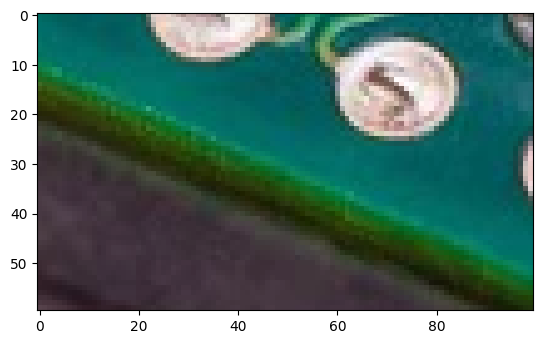

In [13]:
crop = cv2.imread("images/imgcrop.png")
template = cv2.imread("images/imgcrop.png",0 )
img  = cv2.imread("images/chip3.png")
gray  = cv2.imread("images/chip3.png",0)

showC(crop)

In [14]:
# def template_matching(gray, template,method = "squared_diff", threshold  = 0.9):
    
#     height, width = gray.shape[0], gray.shape[1]
#     h_crop , w_crop = template.shape[0], template.shape[1] 
    
#     result =[]
#     for y in range(0, height - h_crop):
#         for x in range(0,width - w_crop):
            
#             crop = gray[y: y+h_crop, x:x+w_crop]
            
#             if method == "squared_diff":
#                 score = squared_difference(crop,template)
                
#             elif method == "cosine_similarity":
#                 score = cosine_similarity(crop,template)
                
                
#             if score > threshold: 
#                 result.append((score,y,x))
                
#     return result              

In [15]:
result = template_matching(gray, template, threshold = 0.95)

NameError: name 'template_matching' is not defined

In [ ]:
print(result[0][0])
print(result[0][1])
print(result[0][2])

0.9999379264351076
230
100


In [ ]:
result[0][0]
y = result[0][1][0]
x = result[0][1][1]

In [18]:

h_crop , w_crop = template.shape[0], template.shape[1]

score: 0.9999379264351076


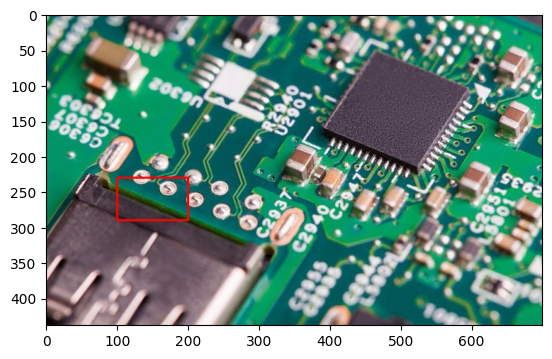

In [ ]:
img_copy = img.copy()
for rect in result:
    score = rect[0]
    print(f'score: {score}')
    y = rect[1]
    x = rect[2]
    cv2.rectangle(img_copy, (x,y),( x+w_crop,y+ h_crop), (0,0,255), 2)
    
showC(img_copy)

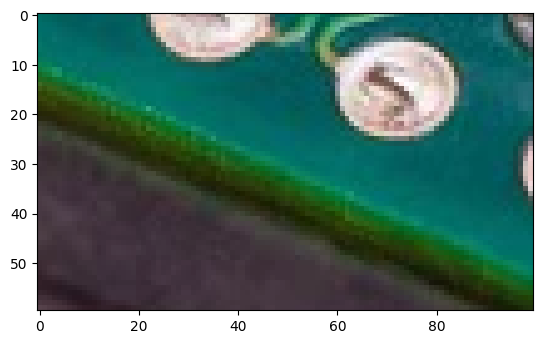

In [ ]:
score = result[0][0]
y = result[0][1]
x = result[0][2]

img_crop = img[y: y + h_crop, x:x+w_crop]
showC(img_crop)

## **Cosine Similarity**
* Cosine similarity cho chúng ta biết mức độ tương đồng giữa hai vector trong không gian đa chiều. Nó đo lường góc giữa hai vector và cung cấp thông tin về hướng và độ tương tự của chúng.

* Giá trị cosine similarity nằm trong khoảng từ -1 đến 1. Các giá trị có ý nghĩa như sau:

  1.Giá trị 1: Hai vector hoàn toàn tương đồng nhau, có cùng hướng và một mối quan hệ tuyến tính hoàn hảo.
  2.Giá trị -1: Hai vector hoàn toàn trái ngược nhau, có hướng ngược và một mối quan hệ tuyến tính hoàn hảo.
  3.Giá trị 0: Hai vector hoàn toàn không tương đồng, không có mối quan hệ tuyến tính.
* Ngoài ra, giá trị gần 1 cho thấy sự tương đồng cao giữa hai vector, trong khi giá trị gần 0 cho thấy sự không tương đồng hoặc không tương tự.

* Cosine similarity là một công cụ quan trọng trong phân tích văn bản, khai phá dữ liệu và xử lý ngôn ngữ tự nhiên. Nó được sử dụng rộng rãi trong các ứng dụng như tìm kiếm thông tin, phân loại văn bản, gợi ý sản phẩm và nhiều lĩnh vực khác để đo lường sự tương đồng giữa các mẫu dữ liệu.


## $$\text{cosine similarity (X,Y)} = \frac{{\mathbf{x_i} \cdot \mathbf{y_i}}}{{\|\mathbf{X}\| \|\mathbf{Y}\|}}$$



Trong đó:
* X.Y. tích vô hướng của 2 vector
* ||X|| ||Y|| norm(X) * norm (Y)

In [19]:
crop = gray [30:30+ h_crop,100: 100+ w_crop ]



b = crop.flatten()*  template. flatten()
dot_product = np.sum(b)
print(dot_product)

norm_x = np.sqrt(np.sum(crop**2))
norm_y = np.sqrt(np.sum(template**2))
print(norm_x*norm_y)

761344
674271.9326799834


In [31]:
a = crop.flatten() * template. flatten()
sum(a)

761344

In [32]:
def cosine_similarity(X, Y):
    
    dot_product  = sum(X.flatten()* Y.flatten())
    
    norm_x = np.sqrt(np.sum(X**2))
    norm_y = np.sqrt(np.sum(Y**2))
    
    return  dot_product / (norm_x* norm_y) 

def template_matching(gray, template,method = "squared_diff", threshold  = 0.9):
    
    height, width = gray.shape[0], gray.shape[1]
    h_crop , w_crop = template.shape[0], template.shape[1] 
    
    result =[]
    for y in range(0, height - h_crop):
        for x in range(0,width - w_crop):
            
            crop = gray[y: y+h_crop, x:x+w_crop]
            
            if method == "squared_diff":
                score = squared_difference(crop,template)
                
            elif method == "cosine_similarity":
                score = cosine_similarity(crop,template)
                
            if score > threshold: 
                result.append((score,y,x))
                
    return result  

In [21]:
score = cosine_similarity(matrix_X, matrix_Y)
score

1.0000000000000002

In [33]:
result = template_matching(gray, template, method="cosine_similarity", threshold = 0.95)

cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...
cosine ...

KeyboardInterrupt: 

In [26]:
result

[(1.1453213498413775, 0, 0),
 (1.1576088512218734, 0, 1),
 (1.1524581852649909, 0, 2),
 (1.1524125811938573, 0, 3),
 (1.1512685626107004, 0, 4),
 (1.1675259646520546, 0, 5),
 (1.1670863540975684, 0, 6),
 (1.1528165562281665, 0, 7),
 (1.1734628913909853, 0, 8),
 (1.146537304662193, 0, 9),
 (1.1461952487227371, 0, 10),
 (1.1458586879456492, 0, 11),
 (1.1661505871467388, 0, 12),
 (1.156029482258922, 0, 13),
 (1.1404774245343026, 0, 14),
 (1.1482656603864247, 0, 15),
 (1.1553000938521722, 0, 16),
 (1.1506774063213847, 0, 17),
 (1.1563896638471176, 0, 18),
 (1.1515333386595163, 0, 19),
 (1.151127457856574, 0, 20),
 (1.140381083088062, 0, 21),
 (1.1334587195170218, 0, 22),
 (1.1354241997180572, 0, 23),
 (1.141193899560437, 0, 24),
 (1.1450062309070195, 0, 25),
 (1.1402547440896358, 0, 26),
 (1.145035919379315, 0, 27),
 (1.1611653542251876, 0, 28),
 (1.1396041175542215, 0, 29),
 (1.1391467706530127, 0, 30),
 (1.1381827284754757, 0, 31),
 (1.1400035627486087, 0, 32),
 (1.1483345781589338, 0, 3

In [ ]:
img_copy = img.copy()
for rect in result:
    score = rect[0]
    print(f'score: {score}')
    y = rect[1]
    x = rect[2]
    cv2.rectangle(img_copy, (x,y),( x+w_crop,y+ h_crop), (0,0,255), 2)
    
showC(img_copy)

## **Correlation Cofficient**

* Độ tương quan (correlation coefficient) giữa hai tập dữ liệu cho chúng ta biết mức độ tương quan hoặc mối quan hệ tuyến tính giữa hai biến. Cụ thể, nó đo lường mức độ đồng biến hay nghịch biến của hai biến và cung cấp thông tin về hướng và mạnh yếu của mối quan hệ.

* Giá trị của correlation coefficient nằm trong khoảng từ -1 đến 1. Các giá trị có ý nghĩa như sau:

  1. Giá trị 1: Tương quan hoàn toàn thuận lợi, tức là hai biến di chuyển cùng hướng với một mối quan hệ tuyến tính hoàn hảo.
  2. Giá trị -1: Tương quan hoàn toàn nghịch lợi, tức là hai biến di chuyển theo hướng ngược nhau với một mối quan hệ tuyến tính hoàn hảo.
  3. Giá trị 0: Không có mối quan hệ tuyến tính giữa hai biến.
  Ngoài ra, giá trị gần 0 thường chỉ ra một mối quan hệ yếu hoặc không tuyến tính. Một giá trị dương cho thấy mối quan hệ thuận lợi, trong khi một giá trị âm cho thấy mối quan hệ nghịch lợi.
* Correlation coefficient là một công cụ quan trọng trong phân tích thống kê và khai phá dữ liệu, giúp chúng ta hiểu rõ hơn về mối quan hệ giữa các biến và có thể áp dụng trong nhiều lĩnh vực như kinh tế, khoa học dữ liệu, y học và nhiều lĩnh vực khác.

* Sự tương quan giữa 2 tập dữ liệu X,và Y [-1:1] được tính theo công thức sau


## $$\text{correlation coefficient} = \frac{{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}}{{\sqrt{\sum_{i=1}^{n}(X_i - \bar{X})^2 \sum_{i=1}^{n}(Y_i - \bar{Y})^2}}}$$
